In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [36]:
data = pd.read_csv("winequality-red dataset.csv", skiprows=2, names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])

In [35]:
data.head()
data.tail()
data.columns
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1360 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1360 non-null   object
 1   volatile acidity      1360 non-null   object
 2   citric acid           1360 non-null   object
 3   residual sugar        1360 non-null   object
 4   chlorides             1360 non-null   object
 5   free sulfur dioxide   1360 non-null   object
 6   total sulfur dioxide  1360 non-null   object
 7   density               1360 non-null   object
 8   pH                    1360 non-null   object
 9   sulphates             1360 non-null   object
 10  alcohol               1360 non-null   object
 11  quality               1360 non-null   object
dtypes: object(12)
memory usage: 138.1+ KB


In [7]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

C:\Users\vanta\AppData\Local\Temp\ipykernel_13000\1048167561.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['quality'], palette='hls')


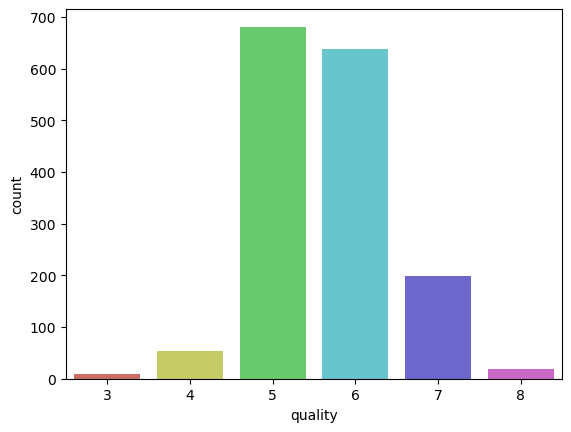

In [8]:
sns.countplot(x=data['quality'], palette='hls')
Num_fea = data.select_dtypes(exclude = 'object')

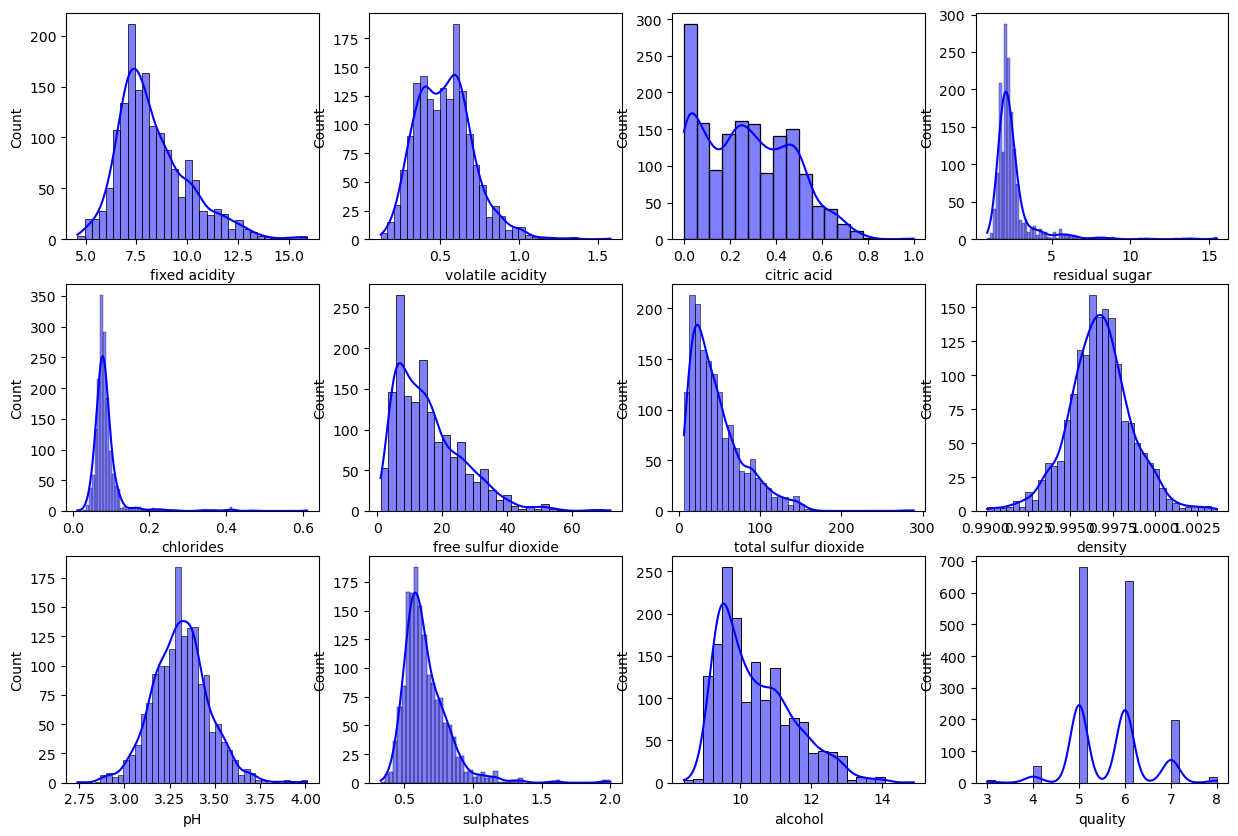

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
k=0 
for i in range(3):
    for j in range(4):
        sns.histplot(data[data.columns[k]], ax=axes[i][j], kde=True, color='blue')
        k+=1
plt.show()

In [31]:
data.isnull().sum()
data.duplicated().sum()
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [32]:
X = data.drop('quality', axis='columns')
X.head()
y= data['quality']
y.head()
y.value_counts()

quality
5          577
6          535
7          167
4           53
8           17
3           10
quality      1
Name: count, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)

In [34]:
X,y=oversample.fit_resample(X.fillna(0),y)

ValueError: could not convert string to float: 'streamlit run fixed acidity'

In [14]:
y.value_counts()
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
x=pd.DataFrame(X)
x.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression()
model_LogReg.fit(X_train,y_train)
LogReg_acc=round(model_LogReg.score(X_test, y_test)*100)
LogReg_acc

61

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import r2_score
LR_Accuracy = round(r2_score(y_test, model.predict(X_test)) * 100)

LR_Accuracy

73

In [18]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
DTR_Accuracy

83

In [19]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
SVR_Accuracy

87

In [20]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(X_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(X_test)) * 100)
RFR_Accuracy

91

In [21]:
from sklearn.metrics import confusion_matrix


In [22]:
 cm=confusion_matrix(y_test, model_LogReg.predict(X_test))

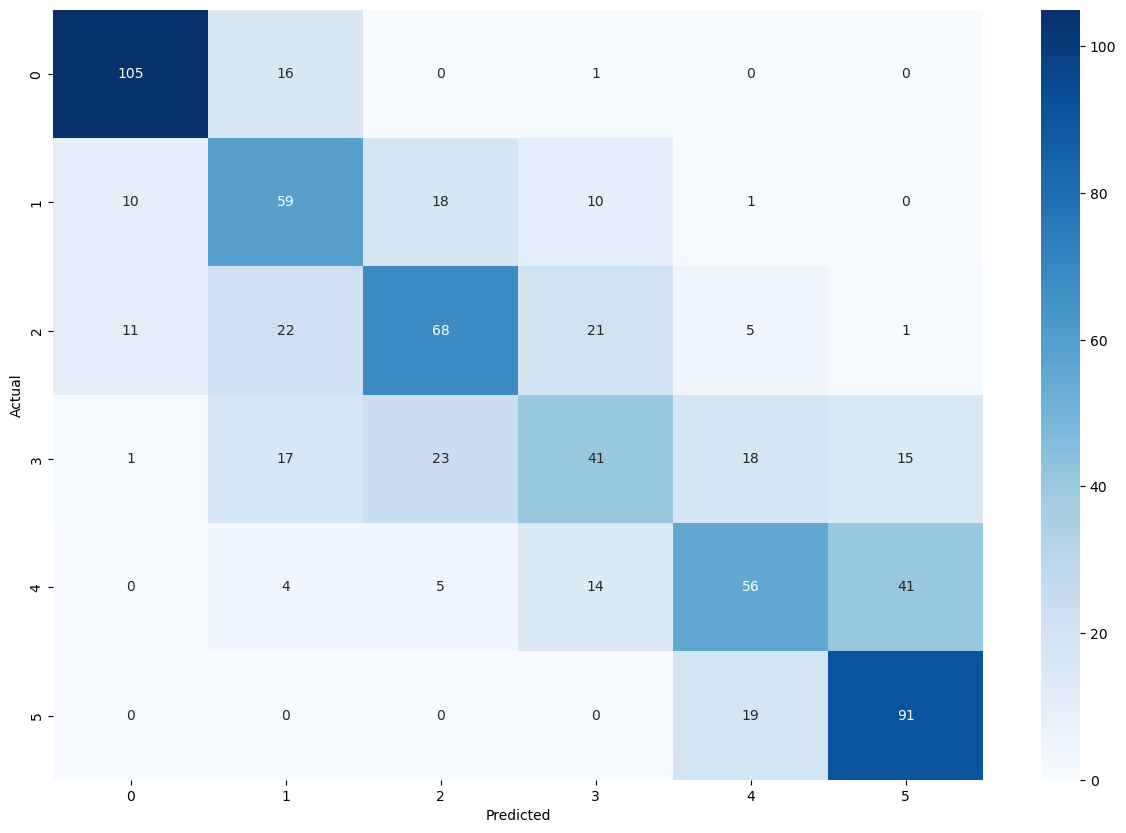

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.show()
cm
from sklearn.metrics import ConfusionMatrixDisplay

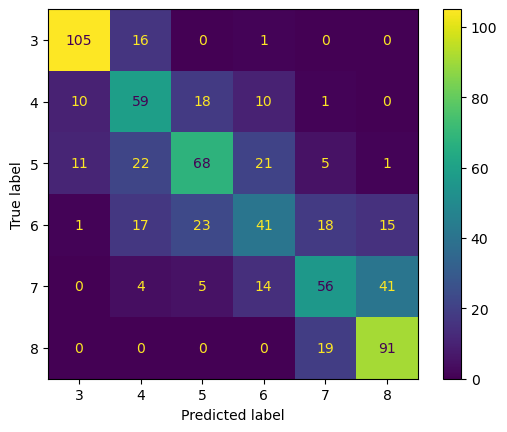

In [24]:

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [3,4,5,6,7,8])
cm_display.plot()
plt.show()
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol']
feature_values={
    'fixed acidity':7.4,
    'volatile acidity':0.70,
    'citric acid':0.00,
    'residual sugar':0.645738,
    'chlorides':0.9,
    'free sulfur dioxide':0.56,
    'total sulfur dioxide':98,
    'density':1,
    'pH':8,
    'sulphates':6.8,
    'alcohol':5.3
}


In [25]:
user_input = pd.DataFrame([feature_values],columns=feature_names)

In [26]:
scaler.transform(user_input)
prediction = RF_model.predict(user_input)

print("predicted value", prediction)

predicted value [5.6]


c:\Users\vanta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [27]:
import pickle 
filename = 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [28]:
import pickle   
filename = 'finalized_RF_model.sav'
pickle.dump(RF_model, open(filename, 'wb'))